In [ ]:
import tensorflow as tf
import matplotlib as plt
import cv2
import imghdr

In [ ]:
#use data science account
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Remove dodgy images
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
extn = ['jpg','jpeg','bmp','png']
data_dir= "/content/drive/MyDrive/data"
for img_class in os.listdir(data_dir):
  for img in os.listdir(os.path.join(data_dir,img_class)):
    img_path = os.path.join(data_dir,img_class,img)
    image = cv2.imread(img_path)
    tip = imghdr.what(img_path)
    if tip not in extn:
      os.remove(img_path)


Found 336 files belonging to 2 classes.


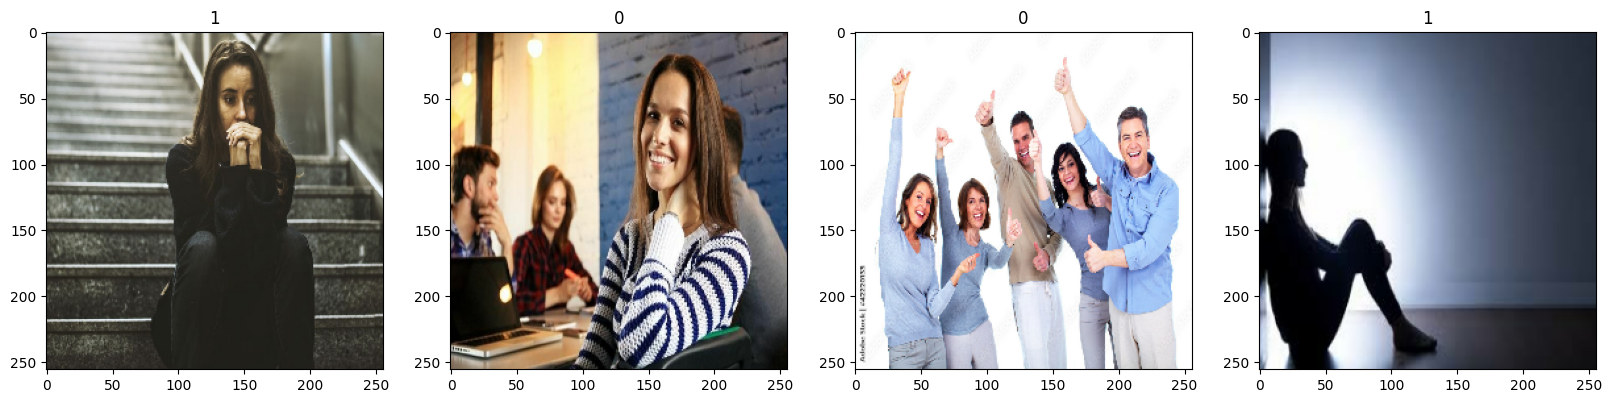

In [ ]:
#loading dataset
import tensorflow as tf
import matplotlib.pyplot as plt
data = tf.keras.utils.image_dataset_from_directory(data_dir) #data pipeline
it = data.as_numpy_iterator() #accessing the data pipeline
batch = it.next() #accessing one batch
len(batch) #length of batch is 2, batch[0] is a numpy array that has all images, batch[1] classes
batch[0].shape
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#scaling the dataset
data = data.map(lambda x,y:(x/255,y))
data.as_numpy_iterator().next()[0].min()

0.0

In [ ]:
#split the data
len(data) #number of batches
train_len = int(len(data)*0.7)
val_len = int(len(data)*0.2)
test_len = int(len(data)*0.1)
train = data.take(train_len)
val = data.skip(train_len).take(val_len)
test = data.skip(train_len+val_len).take(test_len)

In [ ]:
#building the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
#compile the model
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
#train the data
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
7/7 [==============================] - 28s 3s/step - loss: 0.9834 - accuracy: 0.4777 - val_loss: 0.6847 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 25s 3s/step - loss: 0.6769 - accuracy: 0.6875 - val_loss: 0.6564 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 21s 2s/step - loss: 0.6075 - accuracy: 0.6786 - val_loss: 0.5482 - val_accuracy: 0.6562
Epoch 4/20
7/7 [==============================] - 20s 2s/step - loss: 0.5741 - accuracy: 0.6964 - val_loss: 0.5621 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.5142 - accuracy: 0.7321 - val_loss: 0.5067 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 20s 2s/step - loss: 0.4464 - accuracy: 0.8438 - val_loss: 0.3773 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 19s 2s/step - loss: 0.3711 - accuracy: 0.8571 - val_loss: 0.2774 - val_accuracy: 0.8594
Epoch 8/20
7/7 [==================

In [ ]:
hist.history

{'loss': [0.9833741784095764,
  0.6769479513168335,
  0.6074584126472473,
  0.5741105675697327,
  0.5141881704330444,
  0.4463658928871155,
  0.3711206614971161,
  0.3339550197124481,
  0.24645593762397766,
  0.1812034547328949,
  0.117113396525383,
  0.21158002316951752,
  0.17586122453212738,
  0.13285425305366516,
  0.0765702947974205,
  0.025457369163632393,
  0.023630274459719658,
  0.056837208569049835,
  0.0345124825835228,
  0.02808964252471924],
 'accuracy': [0.4776785671710968,
  0.6875,
  0.6785714030265808,
  0.6964285969734192,
  0.7321428656578064,
  0.84375,
  0.8571428656578064,
  0.8571428656578064,
  0.9107142686843872,
  0.9107142686843872,
  0.9642857313156128,
  0.9107142686843872,
  0.9866071343421936,
  0.9508928656578064,
  0.96875,
  0.9955357313156128,
  0.9955357313156128,
  0.9776785969734192,
  0.9910714030265808,
  1.0],
 'val_loss': [0.6846828460693359,
  0.6564258337020874,
  0.5481997132301331,
  0.5620969533920288,
  0.5066608190536499,
  0.37727671861

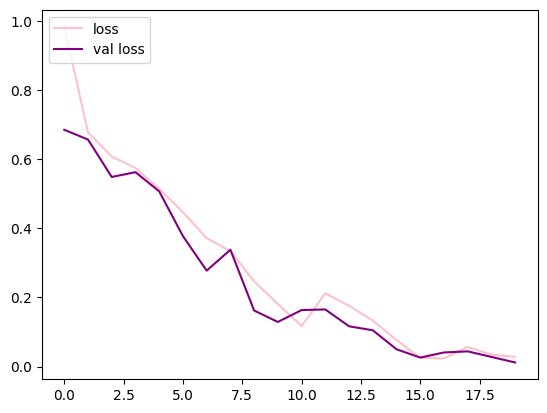

In [ ]:
#plot performance - loss
plt.plot(hist.history['loss'],color='pink',label='loss')
plt.plot(hist.history['val_loss'],color='purple',label='val loss')
plt.legend(loc='upper left')
plt.show()

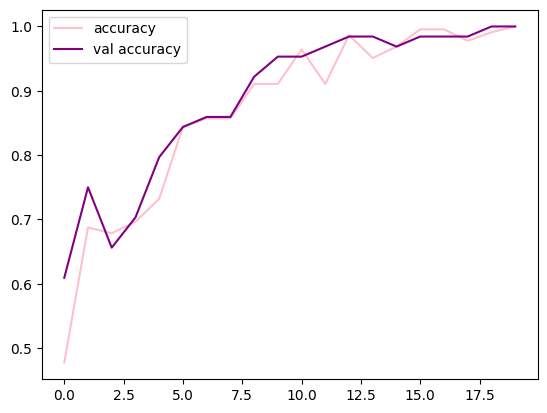

In [ ]:
plt.plot(hist.history['accuracy'],color='pink',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='purple',label='val accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Evaluate performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
print('Precision',pre.result().numpy())
print('Recall',re.result().numpy())
print('Accuracy',acc.result().numpy())

1/1 [==============================] - 0s 464ms/step
Precision 1.0
Recall 1.0
Accuracy 1.0


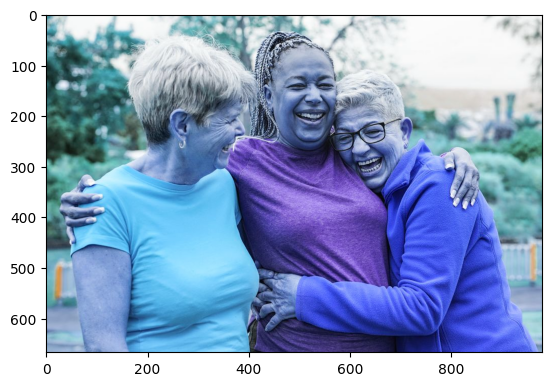

In [ ]:
import tensorflow as tf
import cv2
testim_path = '/content/drive/MyDrive/data/happytest.jpg'
#resize = tf.image.resize(testim,(256,256))
testim=cv2.imread(testim_path)
plt.imshow(testim)
plt.show()

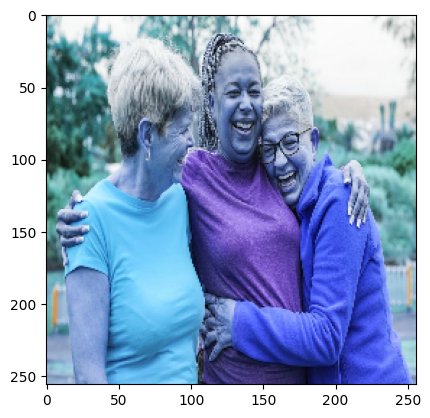

In [ ]:
resize = tf.image.resize(testim,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 133ms/step


In [ ]:
yhat

array([[0.19146198]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print('Sad person')
else:
  print('Happy person')

Happy person


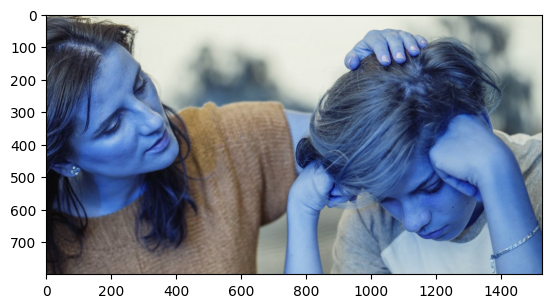

In [35]:
test2path='/content/drive/MyDrive/data/sadtest.jpg'
test2im = cv2.imread(test2path)
plt.imshow(test2im)
plt.show()

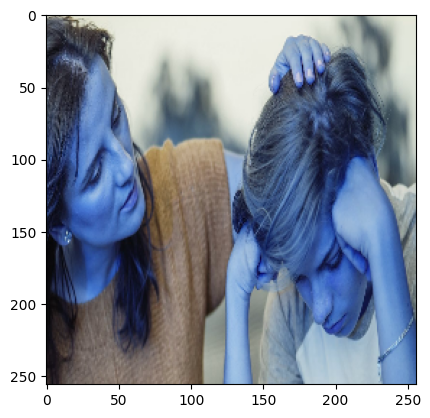

In [37]:
resize2 = tf.image.resize(test2im,(256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize2/255,0))

1/1 [==============================] - 0s 37ms/step


In [39]:
yhat

array([[0.79303247]], dtype=float32)

In [40]:
if yhat > 0.5:
  print('Sad person')
else:
  print('Happy person')

Sad person
